<a href="https://colab.research.google.com/github/ArsT1982/DSML-59-DZ-5/blob/main/DSML_59_DZ_n5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ДЗ-5. Домашнее задание: EDA и улучшение качества модели (California Housing)**

Цель: провести разведочный анализ, отобрать признаки, убрать выбросы и трансформировать данные, чтобы снизить RMSE и повысить R² для модели линейной регрессии.

Пункт №1 (ДЗ).

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


data = fetch_california_housing(as_frame=True)
df = data.frame
df.isna().sum()
#print(df.head())
#print(df.info())
#print(fetch_california_housing().DESCR)

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


Пункт №1. Результат: Получил данные и загрузил их в dataframe рабочей среды

Пункт №2 (ДЗ). Результат: Пропусков нет. Удалять ничего мне не потребовалось.

Пункт №4.

In [14]:
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)


y_pred_train = model.predict(X_train)
y_pred_test  = model.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test  = np.sqrt(mean_squared_error(y_test,  y_pred_test))
r2_train   = r2_score(y_train, y_pred_train)
r2_test    = r2_score(y_test,  y_pred_test)

print(f"Все переменные RMSE (train)={rmse_train:.3f}, (test)={rmse_test:.3f}")
print(f"Все переменные R2   (train)={r2_train:.3f}, (test)={r2_test:.3f}")


Все переменные RMSE (train)=0.720, (test)=0.746
Все переменные R2   (train)=0.613, (test)=0.576


Построена модель линейной регрессии. Вычислены метрики RMSE, R2 на обучающем и тестовом множестве.

Пункт № 5. График распределения целевой переменной 'MedHouseVal'.

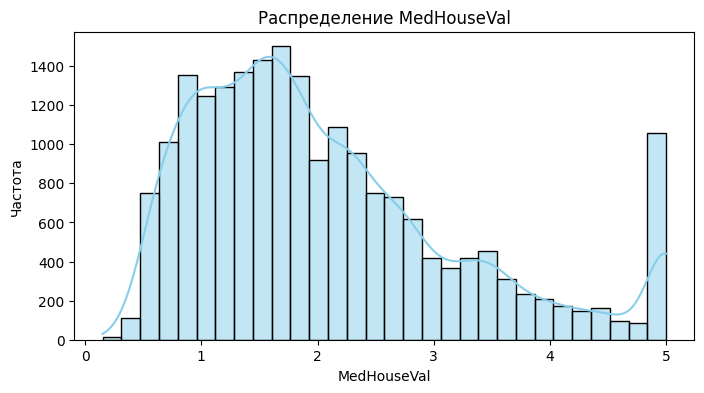

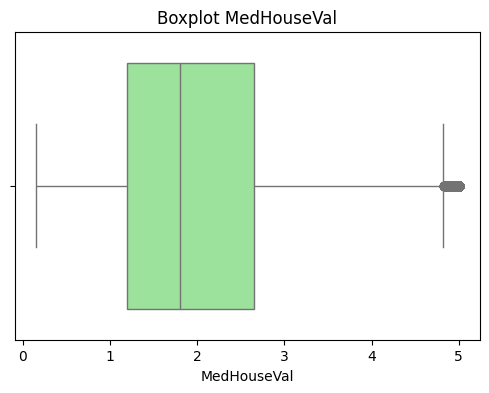

In [15]:
plt.figure(figsize=(8,4))
sns.histplot(y, bins=30, kde=True, color='skyblue')
plt.title('Распределение MedHouseVal')
plt.xlabel('MedHouseVal'); plt.ylabel('Частота')
plt.show()

# boxplot
plt.figure(figsize=(6,4))
sns.boxplot(x=y, color='lightgreen')
plt.title('Boxplot MedHouseVal')
plt.show()

Выбросы присутствуют. Буду с ними работать (убирать в переменных-признаках) для улучшения целевой модели.

Пункт № 6. Вывожу корреляционную матрицу (цветовые категории с числами в ячейках). Выбираю порог корреляции 0.1 (после анализа таблицы) для выбора признаков для дальнейшей работы и удаления не релевантных (по результатам корреляции) признаков.

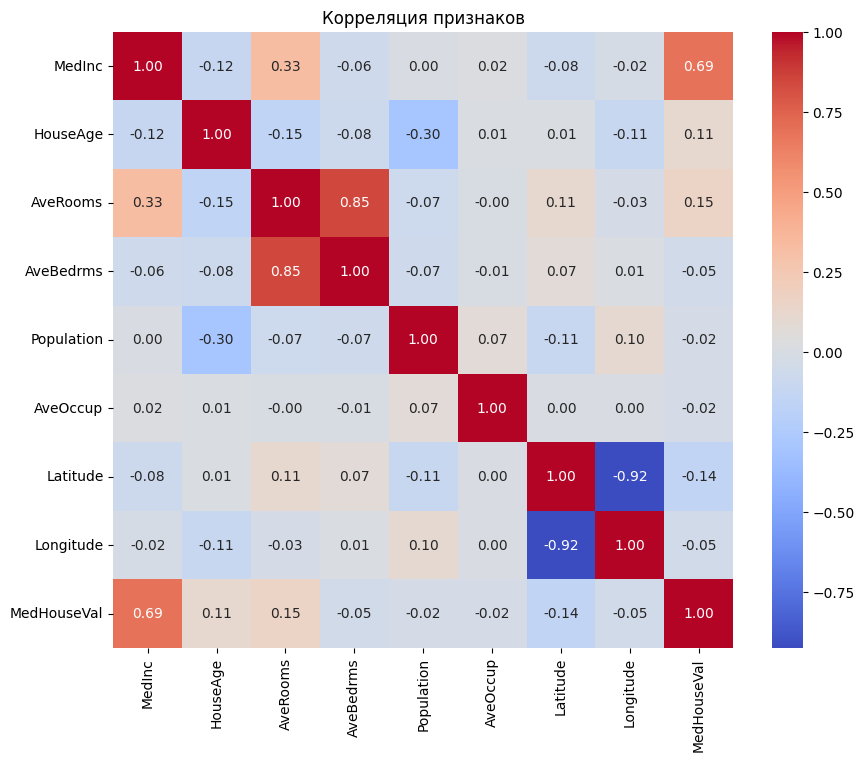

Отобранные признаки: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Latitude', 'Longitude']
Отобранные признаки  → RMSE train=0.721, test=0.746
Отобранные признаки  → R2   train=0.611, test=0.575


In [27]:
plt.figure(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Корреляция признаков')
plt.show()

# Выбераю признаки с |corr| ≥ 0.04 с MedHouseVal
strong = corr['MedHouseVal'].abs() >= 0.04
selected = strong[strong].index.drop('MedHouseVal').tolist()
print("Отобранные признаки:", selected)

X_sel = df[selected]

X1_tr, X1_te, y1_tr, y1_te = train_test_split(
    X_sel, y, test_size=0.2, random_state=42
)


model1 = LinearRegression().fit(X1_tr, y1_tr)
y1p_tr = model1.predict(X1_tr)
y1p_te = model1.predict(X1_te)

rmse1_tr = np.sqrt(mean_squared_error(y1_tr, y1p_tr))
rmse1_te = np.sqrt(mean_squared_error(y1_te, y1p_te))
r2_1tr   = r2_score(y1_tr, y1p_tr)
r2_1te   = r2_score(y1_te, y1p_te)

print(f"Отобранные признаки  → RMSE train={rmse1_tr:.3f}, test={rmse1_te:.3f}")
print(f"Отобранные признаки  → R2   train={r2_1tr:.3f}, test={r2_1te:.3f}")

Вывод: признаки 'MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Latitude', 'Longitude - наиболее сильно коррелируют. Метрики модели на этих признаках примерно такие же. Если увеличивать и уменьшать кол-во признаков - метрики модели становится хуже. Попробую оставить такой набор признаков, остальные удалены.

Пункт № 7. Исследуйте оставленные признаки на выбросы. В признаках кроме MedInc и

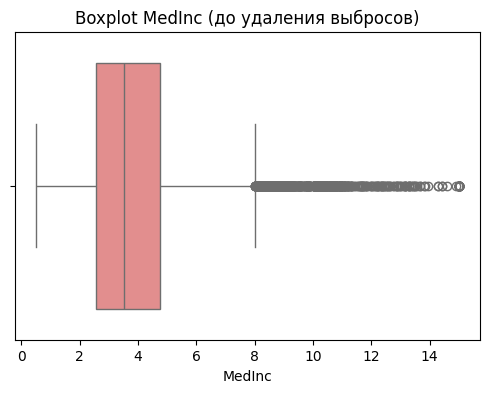

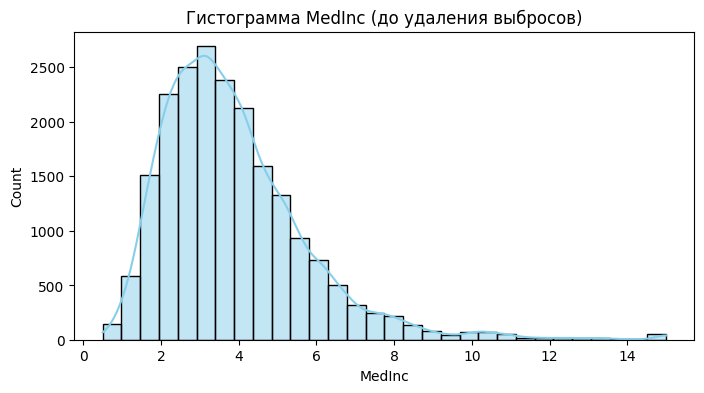

После удаления выбросов осталось 19959 записей (из 20640)


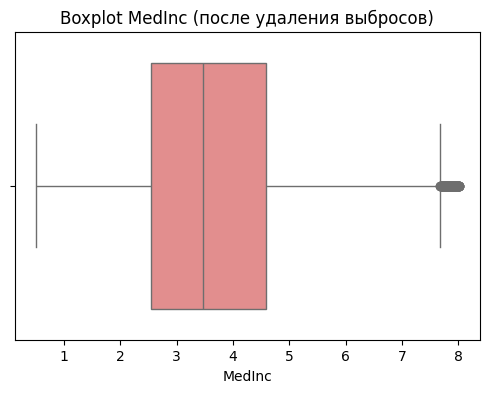

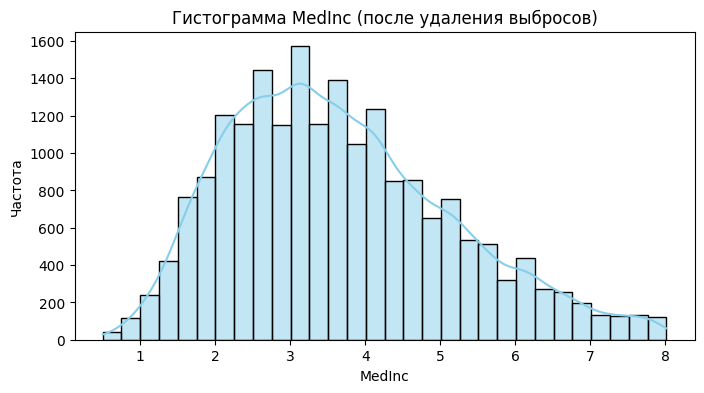

<class 'pandas.core.frame.DataFrame'>
Index: 19959 entries, 2 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       19959 non-null  float64
 1   HouseAge     19959 non-null  float64
 2   AveRooms     19959 non-null  float64
 3   AveBedrms    19959 non-null  float64
 4   Population   19959 non-null  float64
 5   AveOccup     19959 non-null  float64
 6   Latitude     19959 non-null  float64
 7   Longitude    19959 non-null  float64
 8   MedHouseVal  19959 non-null  float64
dtypes: float64(9)
memory usage: 1.5 MB
None
Без выбросов → RMSE test=0.724, R2 test=0.549


In [32]:
# Первым проверяю selected = ['MedInc']
selected_prisnak_1 = ['MedInc']

# Boxplot и гистограмма для этого отобранного признака
for col in selected_prisnak_1:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f'Boxplot {col} (до удаления выбросов)')
    plt.show()

    plt.figure(figsize=(8,4))
    sns.histplot(df[col], bins=30, kde=True, color='skyblue')
    plt.title(f'Гистограмма {col} (до удаления выбросов)')
    plt.show()

    # Вычисляю границы IQR для признака и формирую маску
df_no = df.copy()
for col in selected_prisnak_1:
    Q1 = df_no[col].quantile(0.25)
    Q3 = df_no[col].quantile(0.75)
    IQR = Q3 - Q1
    low, high = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    df_no = df_no[(df_no[col] >= low) & (df_no[col] <= high)]

print(f"После удаления (возможных) выбросов осталось {len(df_no)} записей (из {len(df)})")

for col in selected_prisnak_1:
    # Boxplot
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df_no[col], color='lightcoral')
    plt.title(f'Boxplot {col} (после удаления выбросов)')
    plt.xlabel(col)
    plt.show()

    # Гистограмма
    plt.figure(figsize=(8,4))
    sns.histplot(df_no[col], bins=30, kde=True, color='skyblue')
    plt.title(f'Гистограмма {col} (после удаления выбросов)')
    plt.xlabel(col)
    plt.ylabel('Частота')
    plt.show()


# Повторяю train/test и обучение на X_sel
X_no   = df_no[selected]
y_no   = df_no['MedHouseVal']
print(df_no.info())
X2_tr, X2_te, y2_tr, y2_te = train_test_split(
    X_no, y_no, test_size=0.2, random_state=42
)

model2 = LinearRegression().fit(X2_tr, y2_tr)
y2p_te = model2.predict(X2_te)

rmse2_te = np.sqrt(mean_squared_error(y2_te, y2p_te))
r2_2te   = r2_score(y2_te, y2p_te)
print(f"Без выбросов → RMSE test={rmse2_te:.3f}, R2 test={r2_2te:.3f}")


Важно! Значимых выбросов у признака не было (но распределение не было идеально нормальным и хотелось довести его до идеала). Тем не менее - тестовое удаление возможных выбросов - только ухудшило метрики модели (score r2 с 0.575 изменилось на 0.549). Следующий признак будем проверять без изменений внесенных в этом пункте (отменим мои попытки почистить от выбросов этот признак).

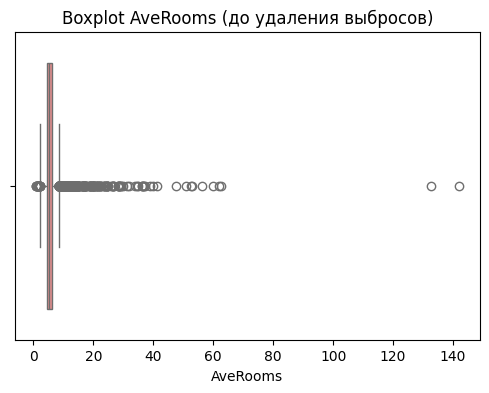

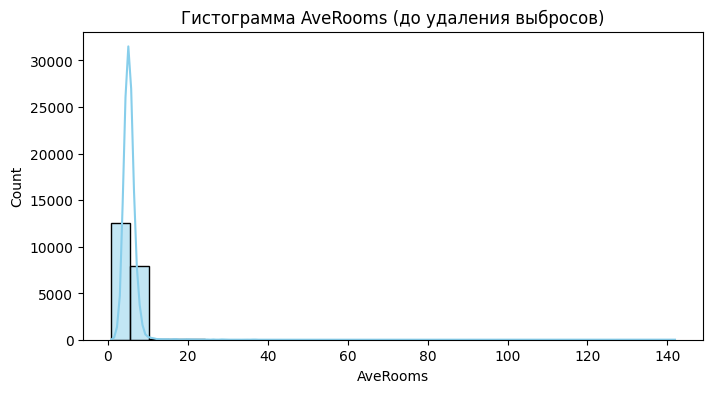

После удаления выбросов осталось 20129 записей (из 19959)


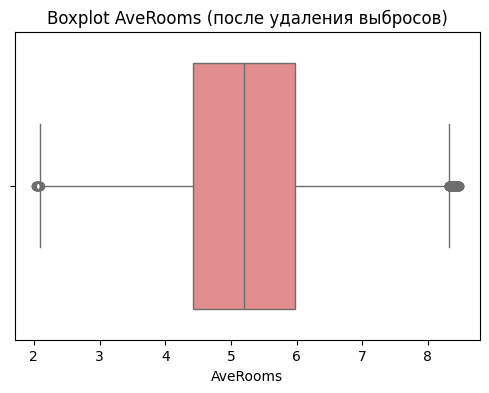

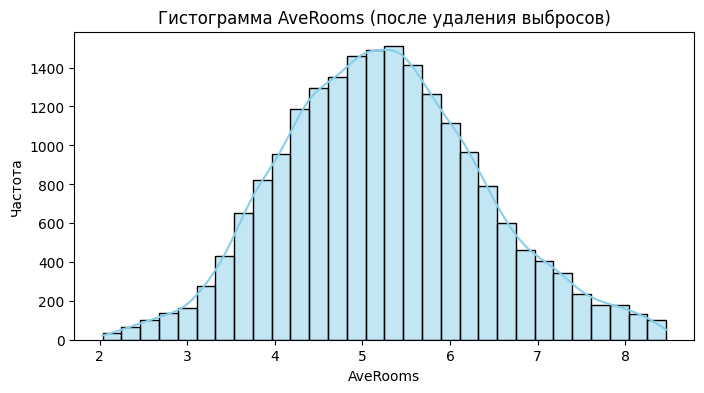

NO OUTLIERS → RMSE test=0.729, R2 test=0.590


In [34]:
# Вторым проверяю selected = ['AveRooms']
selected_prisnak_2 = ['AveRooms']

# 8.1. Boxplot и гистограмма для каждого отобранного признака
for col in selected_prisnak_2:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f'Boxplot {col} (до удаления выбросов)')
    plt.show()

    plt.figure(figsize=(8,4))
    sns.histplot(df[col], bins=30, kde=True, color='skyblue')
    plt.title(f'Гистограмма {col} (до удаления выбросов)')
    plt.show()

# Вычисляю границы IQR для признака и формирую маску
df_no2 = df.copy()
for col in selected_prisnak_2:
    Q1 = df_no2[col].quantile(0.25)
    Q3 = df_no2[col].quantile(0.75)
    IQR = Q3 - Q1
    low, high = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    df_no2 = df_no2[(df_no2[col] >= low) & (df_no2[col] <= high)]

print(f"После удаления выбросов осталось {len(df_no2)} записей (из {len(df_no)})")

for col in selected_prisnak_2:
    # Boxplot
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df_no2[col], color='lightcoral')
    plt.title(f'Boxplot {col} (после удаления выбросов)')
    plt.xlabel(col)
    plt.show()

    # Гистограмма
    plt.figure(figsize=(8,4))
    sns.histplot(df_no2[col], bins=30, kde=True, color='skyblue')
    plt.title(f'Гистограмма {col} (после удаления выбросов)')
    plt.xlabel(col)
    plt.ylabel('Частота')
    plt.show()


# Повторяю train/test и обучение на X_sel
X_no   = df_no2[selected]
y_no   = df_no2['MedHouseVal']
X3_tr, X3_te, y3_tr, y3_te = train_test_split(
    X_no, y_no, test_size=0.2, random_state=42
)

model3 = LinearRegression().fit(X3_tr, y3_tr)
y3p_te = model3.predict(X3_te)

rmse3_te = np.sqrt(mean_squared_error(y3_te, y3p_te))
r2_3te   = r2_score(y3_te, y3p_te)
print(f"Без выбросов → RMSE test={rmse3_te:.3f}, R2 test={r2_3te:.3f}")

Качество метрик улучшилось (score r2 с 0.575 изменилось на 0.590), RMSE также уменшилось (с 0.746 до 0.729.)

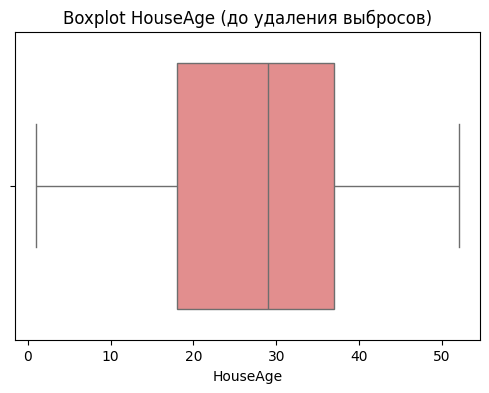

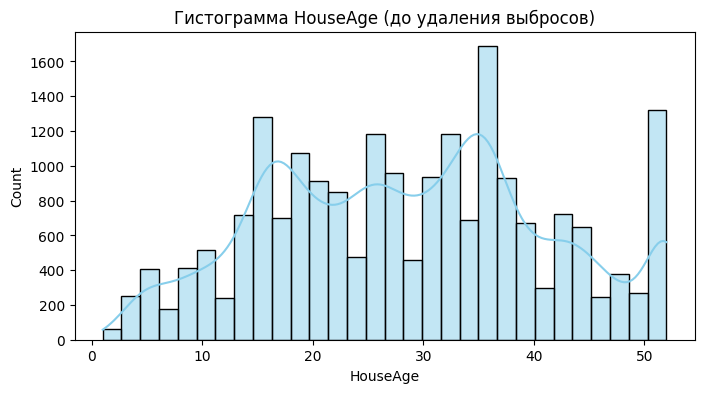

После удаления выбросов осталось 20129 записей (из 19959)


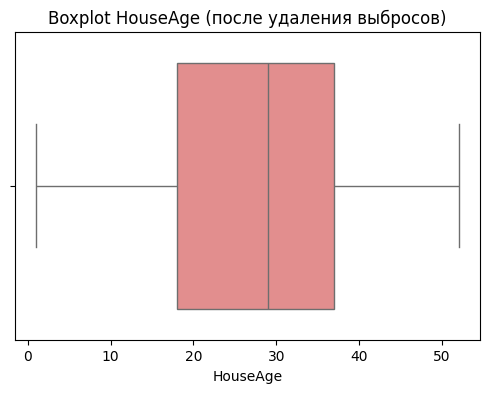

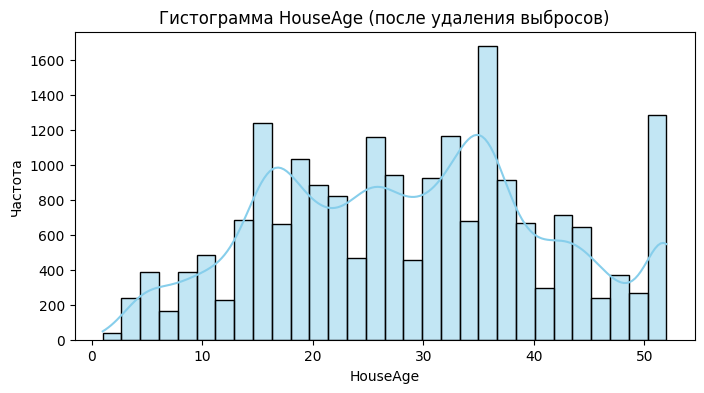

NO OUTLIERS → RMSE test=0.729, R2 test=0.590


In [36]:
# Третим проверяю selected = ['HouseAge']
selected_prisnak_3 = ['HouseAge']

# Boxplot и гистограмма для каждого отобранного признака
for col in selected_prisnak_3:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f'Boxplot {col} (до удаления выбросов)')
    plt.show()

    plt.figure(figsize=(8,4))
    sns.histplot(df[col], bins=30, kde=True, color='skyblue')
    plt.title(f'Гистограмма {col} (до удаления выбросов)')
    plt.show()

# Вычисляю границы IQR для признака и формирую маску
df_no3 = df_no2.copy()
for col in selected_prisnak_3:
    Q1 = df_no3[col].quantile(0.25)
    Q3 = df_no3[col].quantile(0.75)
    IQR = Q3 - Q1
    low, high = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    df_no3 = df_no3[(df_no3[col] >= low) & (df_no3[col] <= high)]

print(f"После удаления выбросов осталось {len(df_no3)} записей (из {len(df_no)})")

for col in selected_prisnak_3:
    # Boxplot
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df_no3[col], color='lightcoral')
    plt.title(f'Boxplot {col} (после удаления выбросов)')
    plt.xlabel(col)
    plt.show()

    # Гистограмма
    plt.figure(figsize=(8,4))
    sns.histplot(df_no3[col], bins=30, kde=True, color='skyblue')
    plt.title(f'Гистограмма {col} (после удаления выбросов)')
    plt.xlabel(col)
    plt.ylabel('Частота')
    plt.show()


# Повторяю train/test и обучение на X_sel
X_no   = df_no3[selected]
y_no   = df_no3['MedHouseVal']
X4_tr, X4_te, y4_tr, y4_te = train_test_split(
    X_no, y_no, test_size=0.2, random_state=42
)

model4 = LinearRegression().fit(X4_tr, y4_tr)
y4p_te = model4.predict(X3_te)

rmse4_te = np.sqrt(mean_squared_error(y4_te, y4p_te))
r2_4te   = r2_score(y4_te, y4p_te)
print(f"Без выбросов → RMSE test={rmse4_te:.3f}, R2 test={r2_4te:.3f}")


Метрики модели ухушлись, аналогично не было выбросов, не улучшилось - значит не применяем эти изменения. Переходим к следующему параметру.

Проверял и 'Latitude' и 'Longitude', но выбросов не было и метрики от "убирания выбросов" - не улучшились. Перешел к последнему признаку 'AveBedrms':

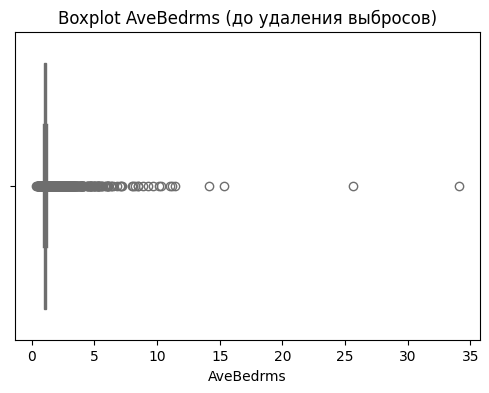

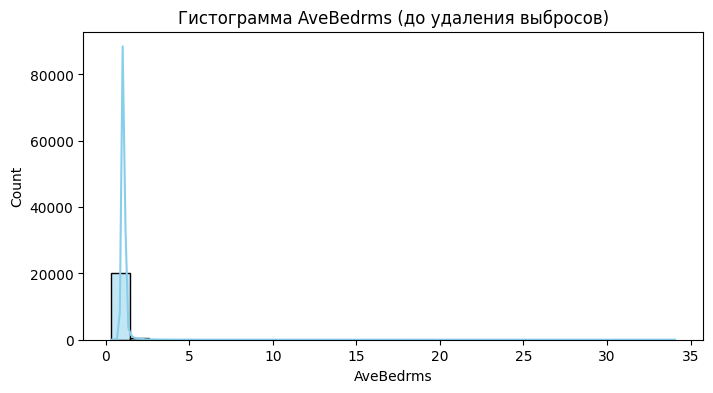

После удаления выбросов осталось 18969 записей (из 19959)


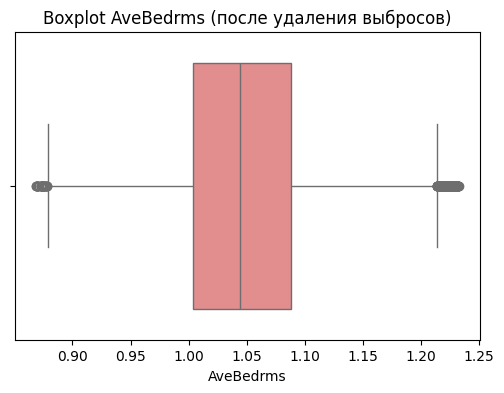

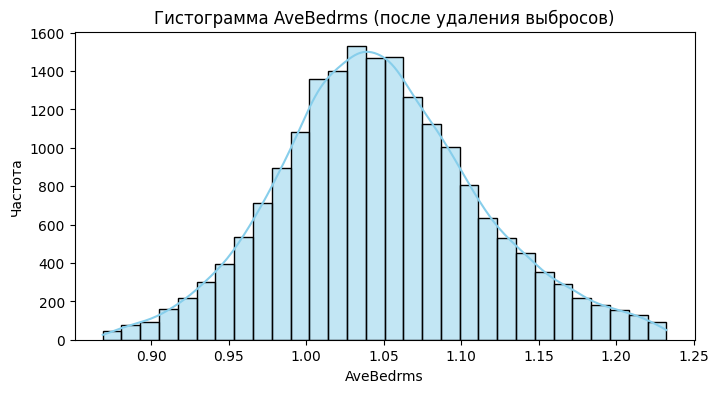

Без выбросов → RMSE test=0.684, R2 test=0.643


In [44]:
# 4м проверяю selected = ['AveBedrms']
selected_prisnak_4 = ['AveBedrms']

#Проверялись 'MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Latitude' и 'Longitude'

# Boxplot и гистограмма
for col in selected_prisnak_4:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col], color='lightcoral')
    plt.title(f'Boxplot {col} (до удаления выбросов)')
    plt.show()

    plt.figure(figsize=(8,4))
    sns.histplot(df[col], bins=30, kde=True, color='skyblue')
    plt.title(f'Гистограмма {col} (до удаления выбросов)')
    plt.show()

# Вычисляю границы IQR для признака и формирую маску
df_no4 = df_no2.copy()
for col in selected_prisnak_4:
    Q1 = df_no4[col].quantile(0.25)
    Q3 = df_no4[col].quantile(0.75)
    IQR = Q3 - Q1
    low, high = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    df_no4 = df_no4[(df_no4[col] >= low) & (df_no4[col] <= high)]

print(f"После удаления выбросов осталось {len(df_no4)} записей (из {len(df_no)})")

for col in selected_prisnak_4:
    # Boxplot
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df_no4[col], color='lightcoral')
    plt.title(f'Boxplot {col} (после удаления выбросов)')
    plt.xlabel(col)
    plt.show()

    # Гистограмма
    plt.figure(figsize=(8,4))
    sns.histplot(df_no4[col], bins=30, kde=True, color='skyblue')
    plt.title(f'Гистограмма {col} (после удаления выбросов)')
    plt.xlabel(col)
    plt.ylabel('Частота')
    plt.show()


# Повторяю train/test и обучение на X_sel
X_no   = df_no4[selected]
y_no   = df_no4['MedHouseVal']
X5_tr, X5_te, y5_tr, y5_te = train_test_split(
    X_no, y_no, test_size=0.2, random_state=42
)

model5 = LinearRegression().fit(X5_tr, y5_tr)
y5p_te = model5.predict(X5_te)

rmse5_te = np.sqrt(mean_squared_error(y5_te, y5p_te))
r2_5te   = r2_score(y5_te, y5p_te)
print(f"Без выбросов → RMSE test={rmse5_te:.3f}, R2 test={r2_5te:.3f}")


Качество метрик улучшилось (score r2 с 0.590 изменилось на 0.643), RMSE также уменшилось (с 0.729 до 0.684.). Хороший результат (как мне видится), двигаюсь дальше.

Пункт 8. Изменение математически признаков.

In [65]:
# Беру DataFrame без выбросов и создаю новые признаки
df_tr = df_no4.copy()

# у нас были исходные признаки: 'MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Latitude' и 'Longitude'
#
# Берём DataFrame без выбросов и создаю:
df_tr = df_no4.copy()

# преобразуем MedInc: логарифм и квадратный корень
df_tr['log_HouseAge']  = np.log1p(df_tr['HouseAge'])
df_tr['sqrt_MedInc'] = np.sqrt(df_tr['MedInc'])

for_drop = ['HouseAge', 'MedInc']
df_tr = df_tr.drop(columns = for_drop)

print(df_tr.head())

#  Готовлю X и y для новой модели
# здесь использую оба трансформированных призака
X3 = df_tr[['log_HouseAge', 'sqrt_MedInc']]
y3 = df_tr['MedHouseVal']

# Разбиваю на train/test
X3_tr, X3_te, y3_tr, y3_te = train_test_split(
    X3, y3, test_size=0.2, random_state=42
)

# Обучаею и оцениваю
model3 = LinearRegression().fit(X3_tr, y3_tr)
y3p_te = model3.predict(X3_te)

rmse3_te = np.sqrt(mean_squared_error(y3_te, y3p_te))
r2_3te   = r2_score(y3_te, y3p_te)
score3   = model3.score(X3_te, y3_te)

print(f"Трансформация доп. признаков → RMSE test={rmse3_te:.3f}, R2 test={r2_3te:.3f}")

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  log_HouseAge  sqrt_MedInc  
0    -122.23        4.526      3.737670     2.885342  
1    -122.22        3.585      3.091042     2.881215  
2    -122.24        3.521      3.970292     2.693956  
3    -122.25        3.413      3.970292     2.375521  
4    -122.25        3.422      3.970292     1.961173  
Трансформация доп. признаков → RMSE test=0.795, R2 test=0.516


Вывод: на выбранных мной признаках математичекое изменение не сраотало в пользу улучшения метрик модели. Я бы остановился на этапе результатах работы с выбросами. (возможно с другим датасетом математические методы сработали бы лучше, буду иметь в арсенале эту возможность)

Вывод по ДЗ-5: Получены знания по проведению разведочного анализа данных. В ходе работы с параметрами добился улучшения качества метрик: (score r2 с 0.576 изменилось на 0.643), RMSE также уменшилось (с 0.746 до 0.684.). Хороший результат (как мне видится). Считаю полезными данные техники (методики), очень увлекательно подбирать этот "ключ к данным".